Number of rows in the dataset: 101

Full dataset:
     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  ve

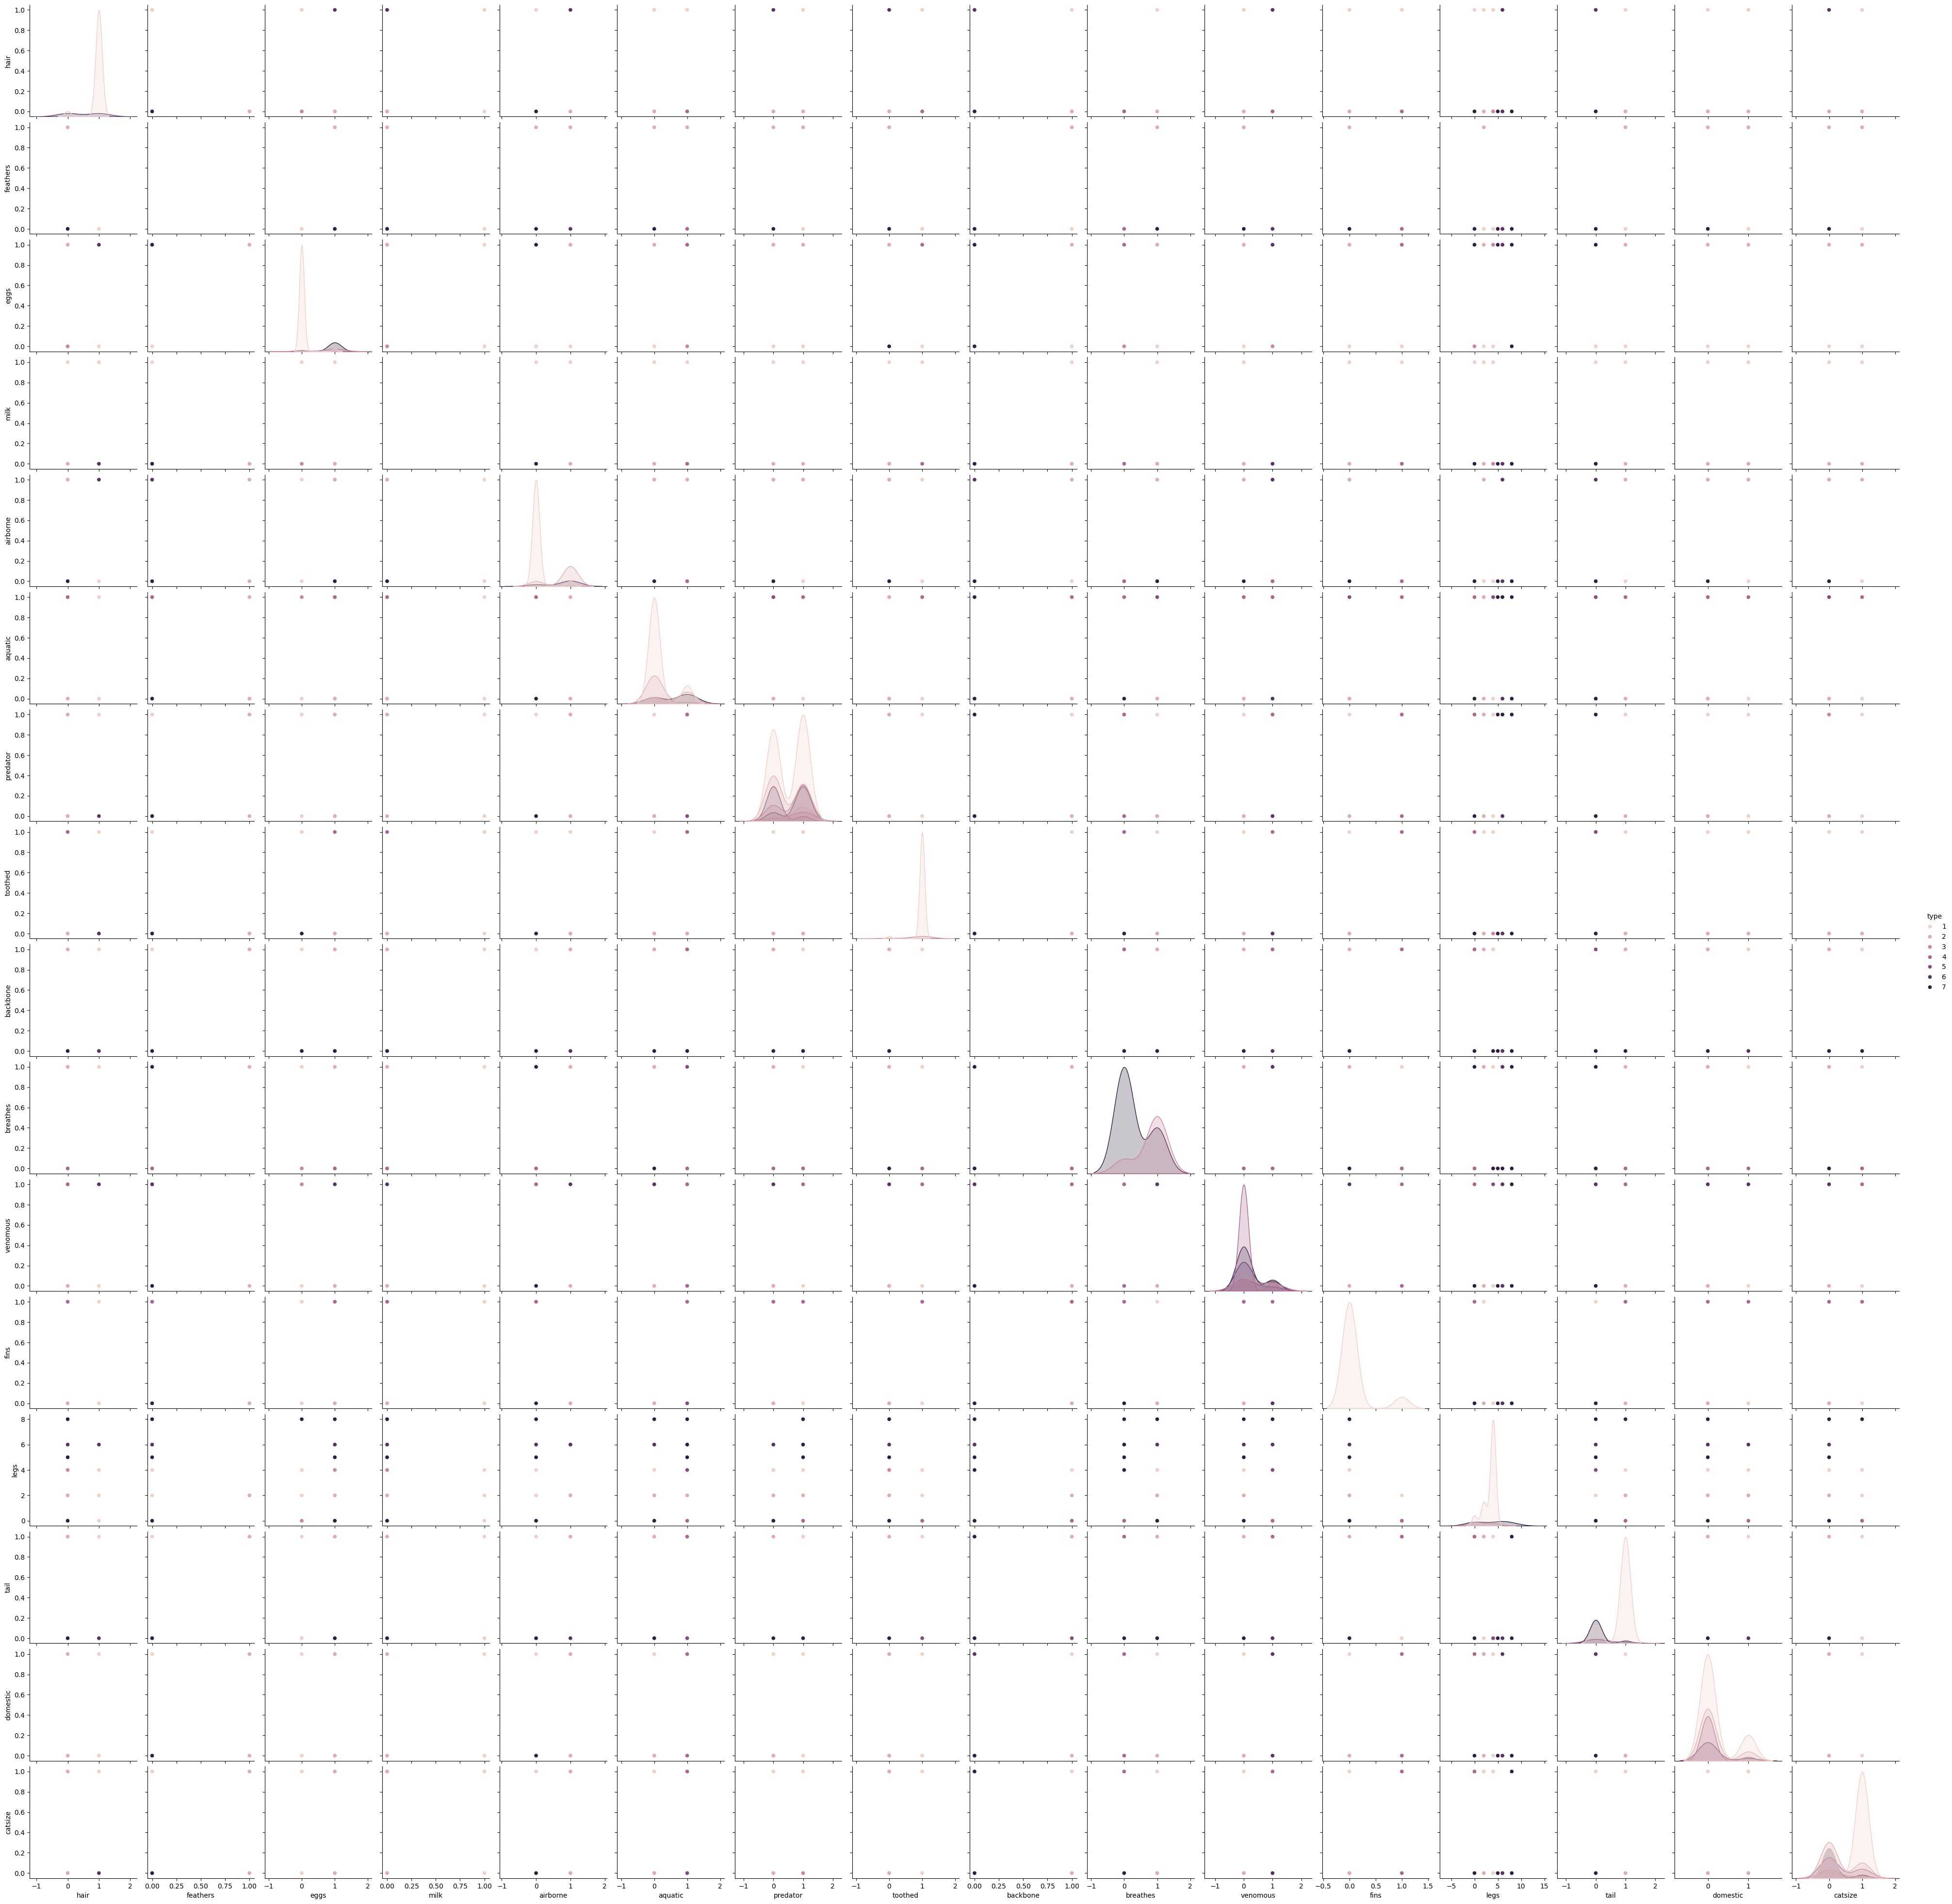


Missing values in the dataset:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


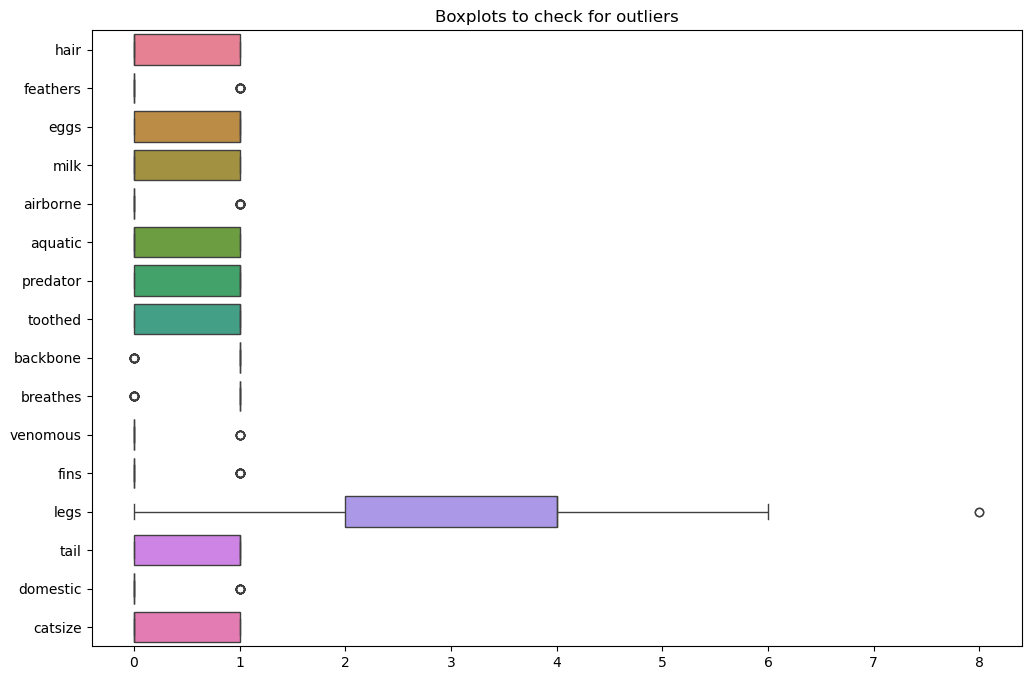

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-Score: 0.9333


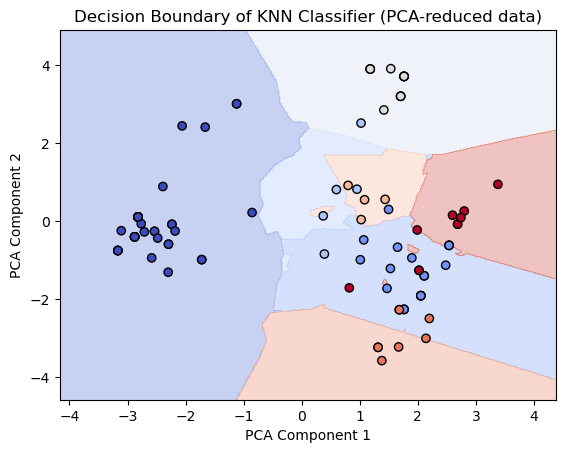

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = "C:/Users/User/Downloads/KNN/KNN/zoo.csv"
df = pd.read_csv(file_path)

# Count the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

# Display the entire dataset
print("\nFull dataset:\n", df)

# Visualizing the data
sns.pairplot(df, hue="type", height=2.5)
plt.show()

# Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())

# Check for outliers using boxplots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['animal name', 'type']), orient='h')
plt.title("Boxplots to check for outliers")
plt.show()

# Split the dataset into features and target variable
X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type']  # Target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement the K-Nearest Neighbors classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Visualize the decision boundaries using PCA for dimensionality reduction (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the reduced dataset for training and testing
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the KNN model on the PCA-reduced data
knn.fit(X_train_pca, y_train)

# Create a mesh grid for visualization
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title("Decision Boundary of KNN Classifier (PCA-reduced data)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
